# Descriptive Statistics
Statistik deskriptif melibatkan meringkas/summarizing dan mengatur data sehingga dapat dengan mudah dipahami. Pada statistik ini biasanya mendeskripsikan data dalam sampel. Jadi statistik deskriptif, tidak seperti statistik inferensial, tidak dikembangkan berdasarkan teori probabilitas. Digunakan dalam Machine Learning untuk membuat prediksi.

## Calculating Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan , 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
# y = np.array[x]
# y_with_nan = np.array[x_with_nan]
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x) ,pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendency
Merupakan nilai tengah atau pisat dari kumpulan data. Adapun cara mengidentifikasi dan menhitungnya berupa:
- Mean
- Weigthed mean
- Geometric mean
- Harmonic mean
- Median
- Mode

### Mean
Merupakan rata-rata aritmatika dari semua item dalam kumpulan data.

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
# Using Numpy
mean_ = np.mean(y)
mean_

8.7

In [8]:
# Use Method
mean_ = y.mean()
mean_

8.7

In [9]:
# Jika ada nilai nan diantara data
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
# Mengabaikan nilai nan
np.nanmean(y_with_nan)

8.7

In [11]:
# Using Pandas
# pd.Series jg punya method .mean()
mean_ = z.mean()
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

### Weighted Mean
Merupakan generalisasi dari rata-rata aritmatika yang memungkinkan untuk menentukan kotribusi relatif dari setiap titik data ke hasil.

Question:
Kita memiliki himpunan di mana 20% dari semua item sama dengan 2, 50% item sama dengan 4, dan 30% sisanya sama dengan 8

In [13]:
# Menghitung rata-rata
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [14]:
# Implementasi Weighted mean dengan menggabungkan sum() dan range() atau zip()
# Using Python Pure
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_,w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [15]:
# Using NumPy
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [16]:
# Solusi lain
(w * y).sum() / w.sum()

6.95

### Harmonic Mean
Adalah the reciprocal of the average of the reciprocals. Reciprocal artinya 1/value. Harmonic mean adalah reciprocal dari mean dari semua item dalam dataset.

Contoh: we travel 10 km at 60km/h, than another 10 km at 20 km/h, what is our average speed?.

Harmonic mean = 1/(1/60 + 1/20) = 30 km/h.

Harmonic juga bagus untuk handling outliers yang besar.
Contoh: 2, 4, 6, dan 100.
Arithmetic mean adalah 2+4+6+100/4 = 28
Harmonic mean adalah 4/(1/2 + 1/4 + 1/6 + 1/100) = 4.32.

In [17]:
# Hmean pada implementasi Python pure
# Pada aritmatik hasilnya adalah 8.7
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [18]:
# Using statistics.harmonic_mean()
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [19]:
scipy.stats.hmean(y)

2.7613412228796843

In [20]:
scipy.stats.hmean(z)

2.7613412228796843

### Geometric Mean
Adalah akar ke-n dari hasil kali semua n elemen xi dalam dataset x, dimana i = 1, 2, ...., n.

Contoh:
- One camera has a zoom of 200 and gets an 8 reviews.
- The another has a zoom of 250 and gets a 6 in reviews.

Aritmatik:
- (200+8)/2 = 104
- (250+6)/2 = 128

Geometric:
- akar(200 x 8) = 40
- akar(250 x 6) = 38.7

Jadi meskipun zoomnya 50 lebih besar, rating pengguna yang lebih rendah(6) tetap menjadi property penting.

In [21]:
# Implementation Geometric mean and Python pure
gmean = 1

for item in x:
    gmean *= item

gmean **= 1/len(x)
gmean

4.677885674856041

In [22]:
# Using scipy
scipy.stats.gmean(y)

4.67788567485604

In [23]:
scipy.stats.gmean(z)

4.67788567485604

### Median
Adalah elemen tengah dari kumpulan data yang diurutkan. Dataset dapat diurutkan dalam urutan naik atau turun.

In [24]:
# Implementasi Python pure dari median
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[indexex-1] + x_ord[index])
    
median_

4

In [25]:
x

[8.0, 1, 2.5, 4, 28.0]

In [26]:
# Using function median
# x[:-1] adalah [8.0, 2.5, 4, 28.0]
# dua elemen tengah adalah 2.5 (low) dan 4 (high)
statistics.median_low(x[:-1])

2.5

In [27]:
statistics.median_high(x[:-1])

4

In [28]:
# Function median tidak mengembalikan nan
print(x)
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

[8.0, 1, 2.5, 4, 28.0]
6.0
4
8.0


In [29]:
# get median with numpy
median_ = np.median(y)
print(median_)

4.0


In [30]:
median_ = np.median(y[:-1])
print(median_)

3.25


### Mode
Adalah kumpulan data yang paling sering muncul. Jika tidak ada satu pun nila tersebut, maka set tersebut multimodal karena memiliki beberapa nilai modal.

In [31]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [32]:
# Using statistics
mode_ = statistics.mode(u)
mode_

2

In [33]:
# Using scipy
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [34]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [35]:
# Using array NumPy with dot notation
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [36]:
# Using Pandas
# .mode() mengembalikan pd.Series baru yang menampung semua nilai modal.
# Jika ingin .mode() memperhitungkan nilai nan, bisa teruskan argumen opsioanl dropna = False
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability
Dibutuhkan dalam ukuran variabilitas yang mengukur penyebaran titik data.
- Variance
- Standard Deviation
- Skewness
- Precentiles
- Ranges

### Variance
Mengukur penyebaran data. Sample variance menunjukkan secara numerik seberapa jauh titik dari mean.

In [37]:
# Cara menghitung variance dengan Python pure
n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

In [38]:
# Using statistics
var_ = statistics.variance(x)
var_

123.2

In [39]:
# Using NumPy
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [40]:
# ddof adalah degrees of freedom
# ddof = 1 yaitu kia hanya kehilangan satu derajat kebebasan, sehingga deegre of freedom yang kita miliki adalah n-1
# yaitu 10 - 1 = 9
var_ = y.var(ddof=1)
var_

123.19999999999999

In [41]:
# Objek ps.Series memiliki metode .var() yang mengabaikan nilai nan secara default
# Jika ingin anggap nan bisa gunakan skipna
z.var(ddof=1)

123.19999999999999

### Standard Deviation
Mengukur penyebaran data. Berhubungan dengan varians sampel, karena standard deviation s, adalah positive square root dari sample variance, dan lebih cocok daripada variance karena memiliki satuan yang sama dengan data points.

In [42]:
# Setelah mendapat variance, hitung deviasi dengan Python pure
std_ = var_** 0.5
std_

11.099549540409285

In [43]:
# Using statistics
std_ = statistics.stdev(x)
std_

11.099549540409287

In [44]:
# Using NumPy
np.std(y, ddof=1)

11.099549540409285

In [79]:
y.std(ddof=1)

15.12454774346805

In [46]:
z.std(ddof=1)

11.099549540409285

### Skewness
untuk mengukur asimetris sampel data

In [47]:
# Setelah hitung ukuran kumpulan data n, sample mean, dan std
# Bisa mendapatkan sample skewness dengan python pure
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1) * (n-2) * std_**3))
skew_ # Hasil skew positif, artinya x mempunyai right-side tail

1.9470432273905929

In [48]:
skew_

1.9470432273905929

In [49]:
# Using scipy
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [50]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [51]:
# using pandas
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [52]:
z_with_nan.skew()

1.9470432273905924

### Precentiles
Adalah elemen dalam kumpulan data sehingga p% elemen dalam kumpulan data kurang dari atau sama dengan nilai tersebut. Juga, (100-p)% elemen lebih besar dari atau sama dengan nilai tersebut. Jika ada dua elemen seperti itu dalam kumpulan data, maka persentil p smpel adalah arithmetic mean mereka. Tiap dataset memiliki tiga quartiles yang merupakan persentil yang membagi dataset menjadi 4 bagian.

In [53]:
# Jika ingin membagi data menjadi beberapa interval, using .quantiles()
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [54]:
# 8.0 adalah median dari x, 0.1 dan 21.0 adalah sampel persentil ke-25 dan ke-75
# Parameter n menentukan jumlah persentil probabilitas sama yang dihasilkan, dan method menentukan cara manghitungnya.
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [55]:
# using NumPy
# percentile() membutuhkan beberapa argumen
# argumen pertama adalah dataset dan nilai persentil sebagai yang kedua.
# dataset berupa array NumPy, list, tuple, atau struktur data serupa.
y = np.array(x)
np.percentile(y, 5)

-3.44

In [56]:
np.percentile(y, 95)

34.919999999999995

In [57]:
# persentil bisa berupa angka antara 0 dan 100 seperti sebelumnya, tetapi bisa juga urutan angka
# jika nilai persentil adalah urutan angka maka akan mengembalikan array NumPy dengan hasilnya
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [58]:
np.median(y)

8.0

In [59]:
# Jika ingin mengembalikan nilai nan
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [60]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [61]:
# Using fungsionalitas quantile dan nanquantile
np.quantile(y, 0.05)

-3.44

In [62]:
np.quantile(y, 0.95)

34.919999999999995

In [63]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [64]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [65]:
# Using pandas
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [66]:
z.quantile(0.95)

34.919999999999995

In [67]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [68]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### Ranges
Adalah perbedaan antara elemen maksimum dan minimum dalam kumpulan data

In [69]:
# Using NumPy
np.ptp(y)

46.0

In [70]:
np.ptp(z)

46.0

In [71]:
np.ptp(y_with_nan)

nan

In [72]:
np.ptp(z_with_nan)

nan

In [73]:
# Contoh fungsi lain
np.amax(y) - np.amin(y)

46.0

In [74]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [75]:
y.max() - y.min()

46.0

In [76]:
z.max() - z.min()

46.0

In [77]:
z_with_nan.max() - z_with_nan.min()

46.0

In [78]:
# **Interquartile range**
# merupakan perbedaan antara kuartil pertama dan ketiga
# setelah menghitung kuartil maka bisa mengambil selisihnya
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

## Summary of Descriptive |Statistics
Function ini digunakan untuk mendapatkan descriptive statistcis dengan cepat dengan satu panggilan fungsi atau method yaitu scipy.stats.describe()

In [81]:
# dataset sebagai argumen pertama berupa array Numpy, list, tuple, atau struktur data serupa
# ddof untuk menghitung varians
# bias = False untuk memaksa mengoreksi skewness dan kurtosis untuk stactistical bias.
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

describe() mengembalikan objek yang berupa descriptive statistic berikut:
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of ypur dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [82]:
result.nobs

9

In [85]:
result.minmax[0] # Min

-5.0

In [86]:
result.minmax[1] # Max

41.0

In [87]:
result.mean

11.622222222222222

In [88]:
result.variance

228.75194444444446

In [89]:
result.skewness

0.9249043136685094

In [90]:
result.kurtosis

0.14770623629658886

In [91]:
# Fungsi serupa pada pandas
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [92]:
# Jika ingin objek series yg dihasilkan berisi persentil lain
# Harus menentukan nilai percentiles parameter opsional
result['mean']

11.622222222222222

In [93]:
result['std']

15.12454774346805

In [94]:
result['min']

-5.0

In [95]:
result['max']

41.0

In [96]:
result['25%']

0.1

In [97]:
result['50%']

8.0

In [98]:
result['75%']

21.0

## Measures of Correlation Between Pairs of Data
Terdiri dari:
- Positive correlation: exists when larger values of x correspond to larger values of y and vice versa.
- Negative correlation: exists when larger values of x correspond to smaller values of y and vice versa.
- Weak or no correlation exists: if there is no such apparent relationship.

In [99]:
# Dua statistik yang mengukur korelasi antar dataset adalah covariance dan correlation coefficient
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

### Covariance
Sample covariance adalah ukuran yang mengukur kekuatan dan arah hubungan antara sepasang variabel:
- If the correlation is positive: then the covariance is positive, as well. A stronger relationship corresponds to a higher value the ciovariance.
- If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
- If the correlation is weak, then the covariance is close to zero.

In [101]:
# Cara menghitung kovarian dengan Python pure
n = len(x)
mean_x, mean_y, = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy # Nila mean x dan y

19.95

In [103]:
# Setelah dapat mean x dan y, menerapkan rumus untuk covariance
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [104]:
# Memeriksa kebenaran matriks
x_.var(ddof=1)

38.5

In [105]:
# Hasil x dan y sama dengan cov_matrix[0, 0] dan cov_matrix[1, 1]
y_.var(ddof=1)

13.914285714285711

In [106]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [107]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [108]:
# Dengan metode pandas
cov_xy = x__.cov(y__)
cov_xy

19.95

In [109]:
cov_xy = y__.cov(x__)
cov_xy

19.95

### Correlation Coefficient
Correlation Coefficient atau Pearson product-moment correlation coefficient dilambangkan r.
- r > 0 indicates positive correlation
- r < 0 indicates negative correlation
- r = 1 is teh maximum possible value of r. it corresponds to a perfect positive linear relationship between variables.
- r = -1 is the minimuym possible value of r. It corresponds to a perfect negative linear relationship between variables.
- r = 0, or when r is around zero, means that the correlation between variables is weak.

In [111]:
# Menghitung correlation coefficient dengan Python Pure
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [112]:
# Dengan scipy.stats
# pearsonr mengembalikan tuple dengan 2 angka, pertama r dan kedua p-value
r, p = scipy.stats.pearsonr(x_, y_)
r

0.861950005631606

In [113]:
p

5.122760847201171e-07

In [116]:
# Menggunakan NumPy
# Elemen kanan bawah adalah correlation coefficient antara y_ dan y_
# Elemen kiri atas adalah correlation coefficient antara x_ dan x_
# Dan 2 lainnya yaitu antara x_ dan y_
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [117]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [118]:
r = corr_matrix[1, 0]
r

0.861950005631606

In [119]:
# Menggunakan scipy.stats.linregress()
# linregress() mengambil x_ dan y_, melakukan regresi, dan mengbalikan hasilnya
# slope dan intercept menentukan persamaan regression line
# rvalue adalah correlation coefficient
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [120]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [121]:
# Menggunakan pandas
r = x__.corr(y__)
r

0.8619500056316061

In [122]:
r = y__.corr(x__)
r

0.861950005631606

## Working With 2D Data
Contoh format 2D:
- Database tables
- CSV Files
Excel, Calc, and Google spreadsheets

### Axes

In [124]:
a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [125]:
# Menerapkan fungsi statistik
np.mean(a)

5.4

In [126]:
a.mean()

5.4

In [127]:
np.median(a)

2.0

In [128]:
a.var(ddof=1)

53.40000000000001

Axes:
- axis=None says to calculate the statistics across all data in the array
- axis=0 says to calculate the statistics across all rows
- axis=1 says to calculate the statistics across all columns

In [129]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [130]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [131]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [132]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [133]:
np.median(a, axis=0)

array([4., 3., 1.])

In [134]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [135]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [136]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [137]:
# Using statistics SciPy
scipy.stats.gmean(a) # Default: axis = 0

array([4.        , 3.73719282, 1.51571657])

In [138]:
scipy.stats.gmean(a, axis = 0)

array([4.        , 3.73719282, 1.51571657])

In [139]:
scipy.stats.gmean(a, axis = 1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [140]:
# Jika untuk seluruh dataset
scipy.stats.gmean(a, axis = None)

2.829705017016332

In [141]:
# Statistic summary
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [143]:
# Default: axis=0
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [144]:
# axis=1
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [146]:
# Mendapatkan nilai tertentu dari ringkasan dengan dot notation
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

### DataFrames

In [147]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [148]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [149]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [150]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [151]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [152]:
# Mengisolasi setiap kolom DataFrame
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [154]:
df['A'].mean()

6.2

In [155]:
df['A'].var()

37.20000000000001

In [156]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [158]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [159]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [160]:
df.describe().at['mean', 'A']

6.2

In [161]:
df.describe().at['50%', 'B']

3.0

### Visualizing Data

In [162]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Box Plots

In [163]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

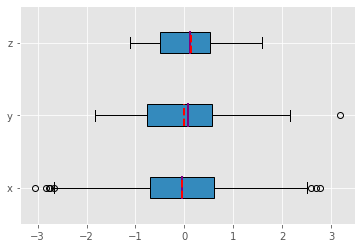

In [170]:
fig, ax = plt.subplots()
ax.boxplot(
    (x, y, z),
    vert=False,
    showmeans=True,
    meanline=True,
    labels=('x', 'y', 'z'),
    patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'}
)

plt.show()

#### Histograms

In [171]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [172]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

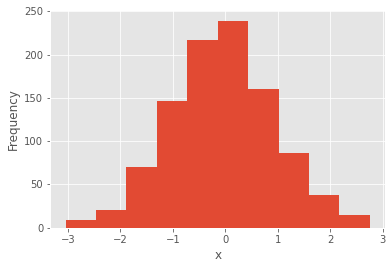

In [175]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

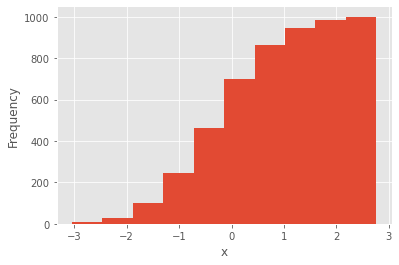

In [176]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

#### Pie Charts

In [177]:
x, y, z = 128, 256, 1024

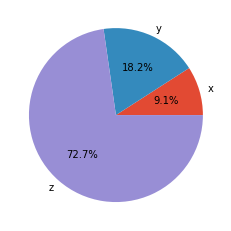

In [180]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

#### Bar Charts

In [182]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

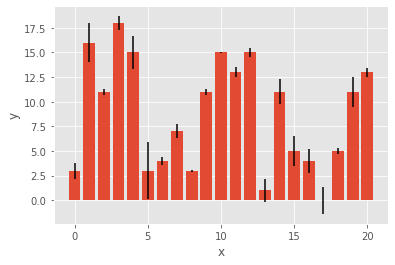

In [183]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#### X-Y Plots

In [185]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r = {r:.2f}'

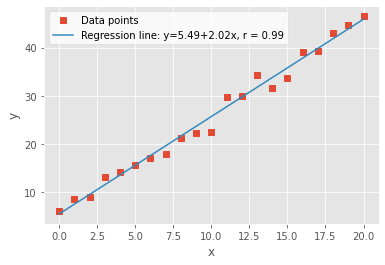

In [186]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

#### Heatmaps

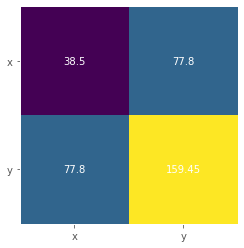

In [189]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(
            j, i, matrix[i, j],
            ha='center',
            va='center',
            color='w'
        )


plt.show()

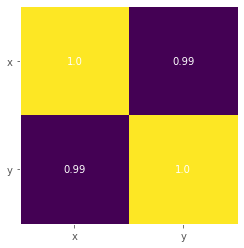

In [190]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(
            j, i, matrix[i, j],
            ha='center',
            va='center',
            color='w'
        )


plt.show()